In [2]:
import torch

print(f"GPU 사용가능? {torch.cuda.is_available()}")

GPU 사용가능? True


In [2]:
print(f"GPU 이름: {torch.cuda.get_device_name(0) if torch.cuda.is_available() else 'CPU 모드'} ")

GPU 이름: Tesla T4 


In [3]:
!pip install -q transformers accelerate sentencepiece

# ! = Colab에서 터미널 명령어 실행
# -q = 조용히 설치 (자세한 로그 숨김)
# transformers = 허깅페이스 핵심 라이브러리
# accelerate = 모델을 빠르게 실행하게 도와줌
# sentencepiece = 한국어 등 다양한 언어의 토큰화에

In [4]:
import transformers
import os

print(f"허깅페이스 코어 라이브러리 버전: {transformers.__version__}")

os.environ['CUDA_LAUNCH_BLOCKING'] = '1'

허깅페이스 코어 라이브러리 버전: 4.57.0


In [8]:
from transformers import pipeline
# pipeline: 복잡한 AI 모델을 간단하게 사용할 수 있게 포장한 도구

sentiment = pipeline("sentiment-analysis")

# pipeline("sentiment-analysis") 설명:
# - 감정 분석 전용 모델을 자동으로 다운로드 및 설정
# - 기본적으로 영어 감정 분석 모델 사용
# - 처음 실행시에만 다운로드, 이후에는 캐시된 파일 사용

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cuda:0


In [9]:
result = sentiment("I love this product!")

print(result)

# 출력: [{'label': 'POSITIVE', 'score': 0.9998}]
# label: POSITIVE(긍정) 또는 NEGATIVE(부정)
# score: 확신도 (0.9998 = 99.98% 확신)

[{'label': 'POSITIVE', 'score': 0.9998855590820312}]


In [10]:
result = sentiment("I don't like coding")

print(result)

[{'label': 'NEGATIVE', 'score': 0.9966006875038147}]


In [11]:
texts = ["This movie is terrible!","Best day ever!","The weather is okay."]

results = sentiment(texts)

for text,result in zip(texts, results):

  print(f"{text} -> {result['label']} ({result['score']:.2%})")


This movie is terrible! -> NEGATIVE (99.97%)
Best day ever! -> POSITIVE (99.99%)
The weather is okay. -> POSITIVE (99.98%)


In [20]:
from transformers import pipeline

korean_sentiment = pipeline("text-classification",model="matthewburke/korean_sentiment")

korean_texts = [
    "이 제품 정말 마음에 들어요!",
    "최악이에요. 환불하고 싶습니다.",
    "그냥 보통이네요."
]

for text in korean_texts:
  result = korean_sentiment(text)[0]

  sentiment = "긍정" if result['label'] == "LABEL_1" else "부정"

  print(text)
  print(f" -> {sentiment} (확신도: {result['score']:.1%})")


Device set to use cuda:0


이 제품 정말 마음에 들어요!
 -> 긍정 (확신도: 97.3%)
최악이에요. 환불하고 싶습니다.
 -> 부정 (확신도: 96.1%)
그냥 보통이네요.
 -> 긍정 (확신도: 71.5%)


In [11]:
from transformers import pipeline

generator = pipeline("text-generation",model="gpt2")


prompt = "The essential skills that web backend developers must have in the AI ​​era are"

results = generator(
    prompt, # 시작 문장
    max_length = 100, # 생성할 최대 토큰 수
    num_return_sequences = 3, # 생성할 문장 각기 다른 3가지
    temperature= 0.8,
    # Temperature 상세 설명:
    # - AI는 다음 단어를 확률로 예측
    # - 낮은 값: 가장 확률 높은 단어만 선택 → 안전하고 일관성 있음
    # - 높은 값: 확률 낮은 단어도 선택 → 창의적이지만 때로 이상함
    #
    # 실전 예시:
    # 0.1 = 예측 가능하고 안전한 답변 (뉴스 요약, 공식 문서 등)
    # 0.7-0.9 = 적당히 창의적 (블로그 글, 일반 대화 등)
    # 1.5 이상 = 매우 창의적 (소설, 시, 브레인스토밍 등)
    do_sample =True
    # do_sample 설명:
    # True: 확률적으로 선택 → 실행할 때마다 다른 결과
    # False: 가장 확률 높은 것만 선택 → 항상 같은 결과
    )

print("=== AI가 쓴 3가지 미래 예측 ===")

# enumerate(리스트, 시작숫자) 설명:
# - 리스트를 순회하면서 인덱스 번호도 함께 제공
# - 예: enumerate(['a','b','c'], 1) → (1,'a'), (2,'b'), (3,'c')

for idx,result in enumerate(results,1):
  print(f"{idx}. {result['generated_text']}")
  print("-" * 50)  # 구분선 (50개의 대시)


Device set to use cuda:0
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=100) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


=== AI가 쓴 3가지 미래 예측 ===
1. The essential skills that web backend developers must have in the AI ​​era are: ​

​ ​ ​

​ ​

​ ​

​ ​

​ ​

The first step towards getting the most out of your system is to build a user experience. The API is a very easy way to build your system and will give you the ability to integrate new features.

In this article I talk about building your systems based on the API and how to find the right tools and frameworks for your needs. This tutorial provides youwith the best of both worlds, using the latest technologies available.

The core of your application is a web interface that can be used to get information that can then be used to interact with a website or application. This information can be displayed on a webpage in the browser or displayed to your users in the browser.

For this module I will be using the web interface so that users can find out how to interact with the website.

In this tutorial I will show you how to use an API to access the User I

In [12]:
summarizer = pipeline("summarization",model="sshleifer/distilbart-cnn-12-6")

# 긴 텍스트
long_text = """
Artificial intelligence is rapidly transforming every aspect of our lives.
From healthcare to transportation, education to entertainment, AI systems
are becoming increasingly sophisticated and widespread. Machine learning
algorithms can now diagnose diseases with remarkable accuracy, autonomous
vehicles are becoming a reality, and personalized education is being
revolutionized by AI tutors. However, these advances also raise important
questions about privacy, job displacement, and the ethical use of AI.
As we move forward, it will be crucial to develop AI responsibly, ensuring
that it benefits all of humanity while minimizing potential risks.
"""

summary = summarizer(
                     long_text,
                     max_length=50, # 요약문의 최대 길이 (단어 수)
                     min_length=10, # 요약문의 최소 길이 (너무 짧은 요약 방지)
                     do_sample=False # False=가장 확실한 답, True=다양한 답 중 선택
                     )

print(f"원문 길이: {len(long_text.split())} 단어")
print("------ 요약 ------")
print(summary[0]['summary_text'])
print(f"요약문 길이: {len(summary[0]['summary_text'].split())} 단어")



config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

Device set to use cuda:0


원문 길이: 90 단어
------ 요약 ------
 Artificial intelligence is rapidly transforming every aspect of our lives . It will be crucial to develop AI responsibly, ensuring it benefits all of humanity while minimizing potential risks .
요약문 길이: 30 단어


In [14]:
# 영어 → 여러 언어로 번역
translators = {
    "프랑스어": pipeline("translation_en_to_fr", model="Helsinki-NLP/opus-mt-en-fr"),
    "독일어": pipeline("translation_en_to_de", model="Helsinki-NLP/opus-mt-en-de"),
    "스페인어": pipeline("translation_en_to_es", model="Helsinki-NLP/opus-mt-en-es")
}

english_text = "I am off to school."

print(f"원문: {english_text}")
print("번역 결과:")
for language, translator in translators.items():
    translation = translator(english_text)[0]['translation_text']
    print(f"  {language}: {translation}")


Device set to use cuda:0
Device set to use cuda:0
Device set to use cuda:0


원문: I am off to school.
번역 결과:
  프랑스어: Je vais à l'école.
  독일어: Ich gehe zur Schule.
  스페인어: Me voy a la escuela.


In [15]:
qa_pipeline = pipeline("question-answering")

# 문서 (컨텍스트)
context = """
Hugging Face was founded in 2016 by Clément Delangue and Julien Chaumond.
The company provides over 1 million AI models through their platform.
Their main office is located in New York City, United States.
The company's most famous product is the Transformers library.
"""

# 질문들
questions = [
    "When was Hugging Face founded?",
    "How many models does Hugging Face provide?",
    "Where is Hugging Face located?"
]

for question in questions:
  answer = qa_pipeline(question = question, context = context)
  print(f"Question: {question}")
  print(f"A: {answer['answer']} (확신도: {answer['score']:.1%})")

No model was supplied, defaulted to distilbert/distilbert-base-cased-distilled-squad and revision 564e9b5 (https://huggingface.co/distilbert/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/473 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/261M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

Device set to use cuda:0


Question: When was Hugging Face founded?
A: 2016 (확신도: 97.0%)
Question: How many models does Hugging Face provide?
A: over 1 million (확신도: 59.7%)
Question: Where is Hugging Face located?
A: New York City, United States (확신도: 80.8%)


## 5. 이미지/음성 처리 실습

No model was supplied, defaulted to google/vit-base-patch16-224 and revision 3f49326 (https://huggingface.co/google/vit-base-patch16-224).
Using a pipeline without specifying a model name and revision in production is not recommended.
Fast image processor class <class 'transformers.models.vit.image_processing_vit_fast.ViTImageProcessorFast'> is available for this model. Using slow image processor class. To use the fast image processor class set `use_fast=True`.
Device set to use cuda:0


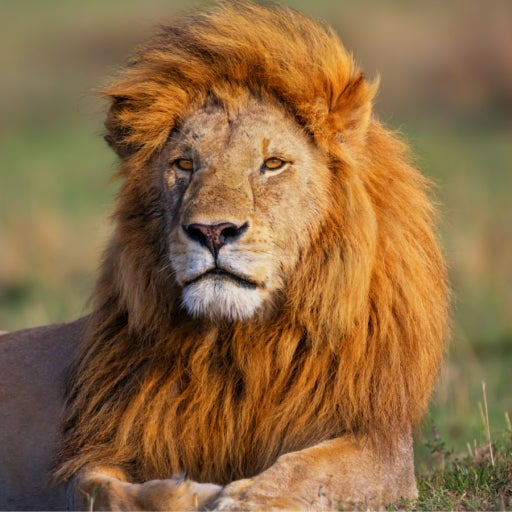

🤖 AI가 본 결과:
   lion, king of beasts, Panthera leo: 99.8%
   tiger, Panthera tigris: 0.0%
   cheetah, chetah, Acinonyx jubatus: 0.0%


In [18]:
from transformers import pipeline
from PIL import Image  # PIL: 이미지를 읽고 처리하는 Python 라이브러리
import requests # requests: 인터넷에서 데이터를 가져오는 라이브러리
from io import BytesIO # BytesIO: 메모리에서 파일처럼 사용할 수 있게 해줌

image_clssifier = pipeline("image-classification")

url = "https://search.pstatic.net/common/?src=http%3A%2F%2Fblogfiles.naver.net%2FMjAyNTA4MjlfMTE4%2FMDAxNzU2NDE3Nzc2NTU4.Ol8zF4KHNLWIXatJfek39tN5TrgFeb5wvXboUYAHN0wg.GOmuvzO4QSup1-DW5vhAfAiHCLujBgQ6cw3EjX_JLy0g.PNG%2F900%25A3%25DF3%25A3%25DF20250829%25A3%25DF063514%25A3%25DF0002.png&type=sc960_832"

# 1. requests.get(url): 인터넷에서 이미지 다운로드
response = requests.get(url)

# 2. BytesIO(response.content): 다운로드한 이미지 데이터를 메모리에 저장
# 3. Image.open(): 메모리의 이미지 데이터를 PIL Image 객체로 변환
#
# 왜 이렇게 복잡한가?
# - 파일로 저장하지 않고 메모리에서 바로 처리 (속도 빠름)
# - 디스크 공간 절약

image = Image.open(BytesIO(response.content))

display(image)

print("🤖 AI가 본 결과:")
# top_k=3: 상위 3개 예측 결과만 반환
# - AI는 여러 가능성을 예측 (고양이 90%, 개 5%, 호랑이 3%, ...)
# - top_k로 상위 몇 개만 볼지 결정
results = image_clssifier(image,top_k=3)

for result in results:
    # result['label']: 예측된 카테고리 (예: "tabby cat")
    # result['score']: 확신도 (0~1 사이 값)
    print(f"   {result['label']}: {result['score']:.1%}")



Saving 다운로드 (3).jpg to 다운로드 (3).jpg


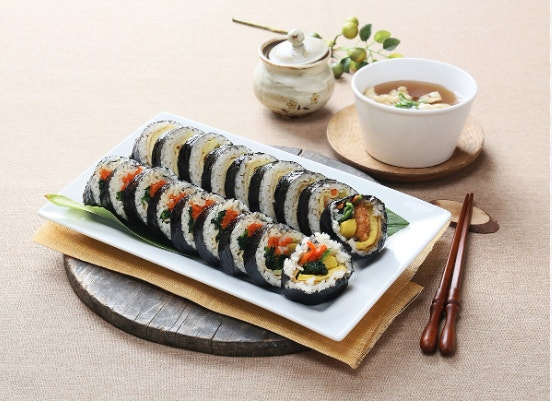

분류결과: [{'label': 'plate', 'score': 0.1381600946187973}, {'label': 'tray', 'score': 0.10418933629989624}, {'label': 'meat loaf, meatloaf', 'score': 0.07745283097028732}]


In [24]:
from google.colab import files

# 파일 업로드 버튼 생성
uploaded = files.upload()

# 업로드한 이미지 분석
if uploaded:
  filename = list(uploaded.keys())[0]
  image = Image.open(filename)

  display(image)

  # 이미지 분류
  results = image_clssifier(image,top_k=3)
  print("분류결과:", results)

config.json: 0.00B [00:00, ?B/s]

/usr/local/lib/python3.12/dist-packages/transformers/models/auto/modeling_auto.py:2284: FutureWarning: The class `AutoModelForVision2Seq` is deprecated and will be removed in v5.0. Please use `AutoModelForImageTextToText` instead.
  warnings.warn(


pytorch_model.bin:   0%|          | 0.00/990M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/990M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/506 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/287 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
Device set to use cuda:0


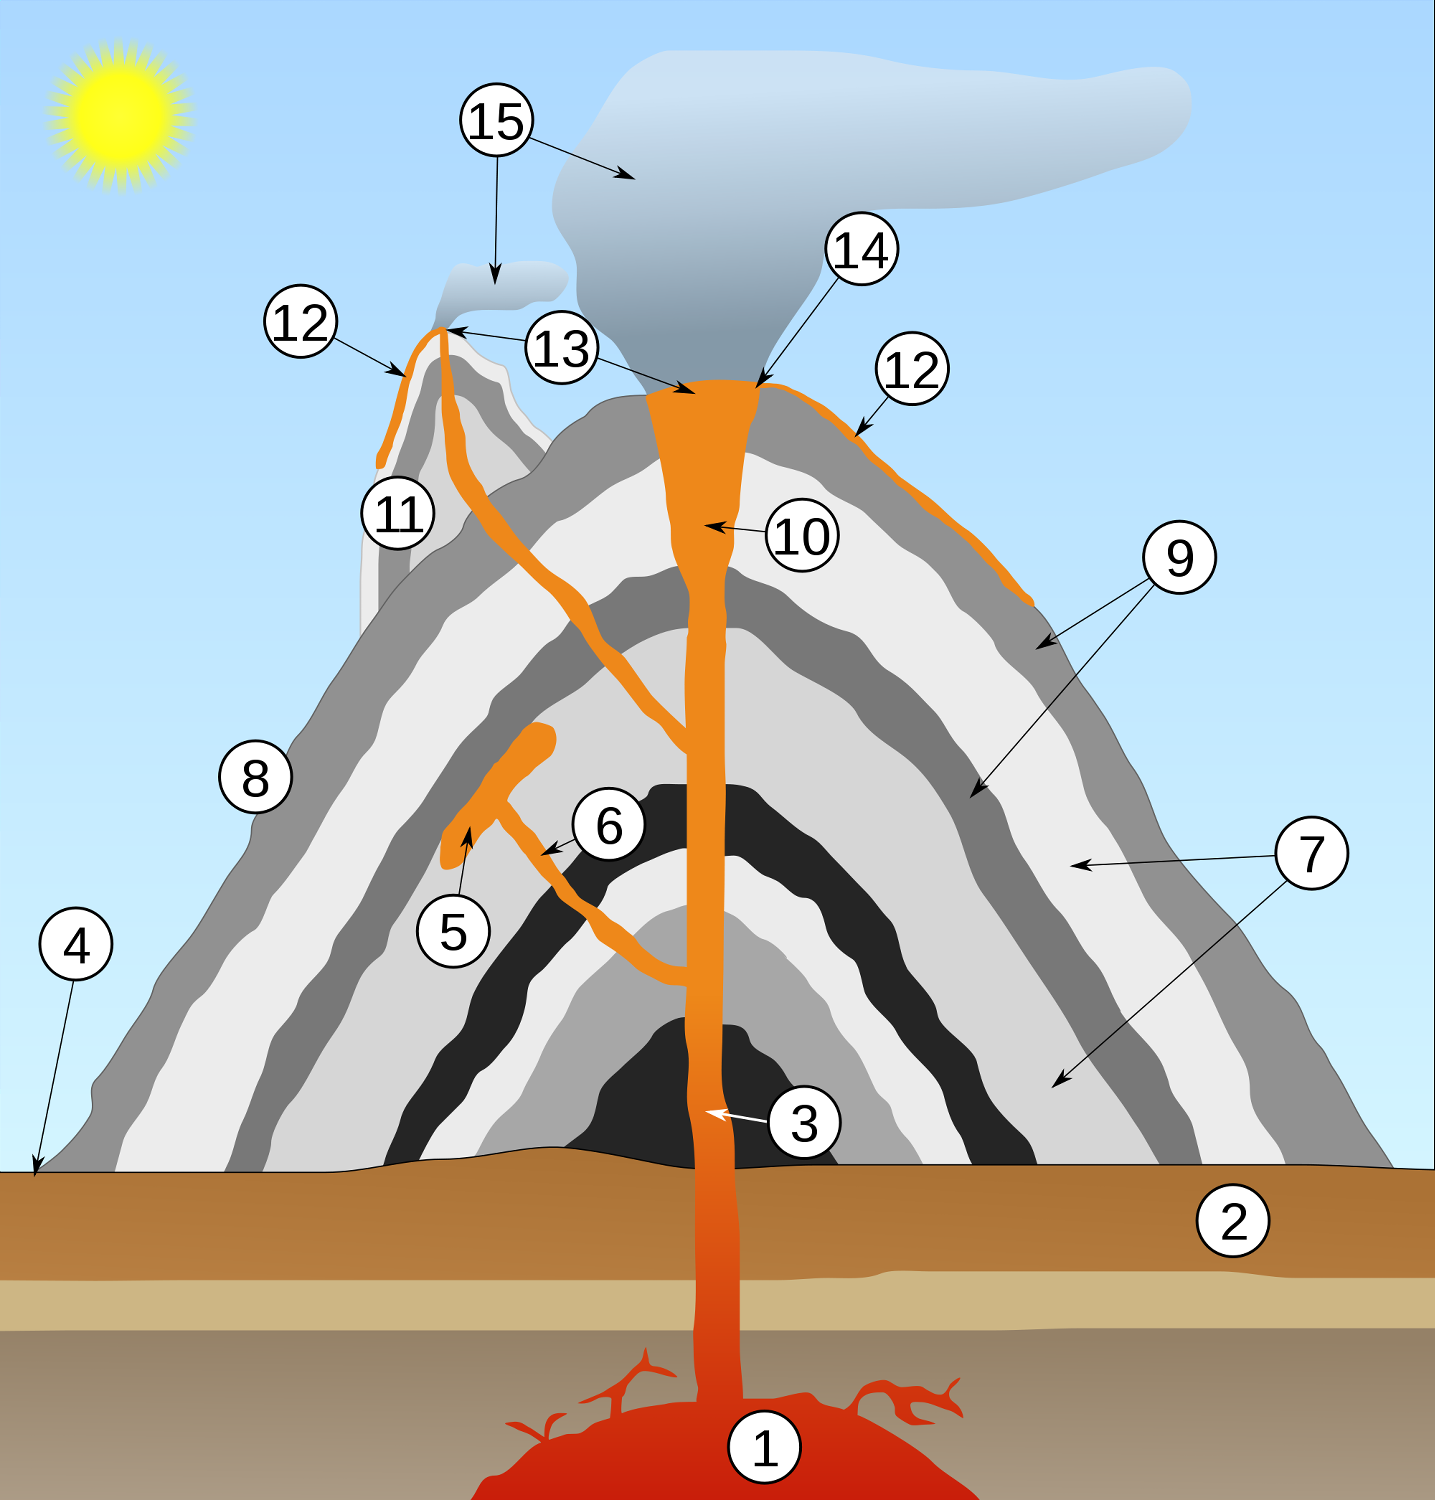


📝 AI가 생성한 설명: a diagram of the layers of a volcano


In [25]:
captioner = pipeline(
    "image-to-text",
    model="Salesforce/blip-image-captioning-base"
)

# 이미지 준비 (위와 동일한 이미지 사용 가능)
url = "https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/transformers/tasks/ai2d-demo.jpg"
response = requests.get(url)
image = Image.open(BytesIO(response.content))

display(image)

# 캡션 생성
caption = captioner(image)[0]['generated_text']
print(f"\n📝 AI가 생성한 설명: {caption}")

In [27]:
# Whisper 모델로 음성 인식
# Whisper: OpenAI가 만든 음성 인식 AI (99개 언어 지원!)
# whisper-tiny: 가장 작고 빠른 버전 (정확도는 약간 낮지만 CPU에서도 빠름)
# 다른 버전: tiny < base < small < medium < large (크기/정확도 순)

speech_recognizer = pipeline(
    "automatic-speech-recognition",
    model="openai/whisper-small"
)

audio_url = "https://huggingface.co/datasets/Narsil/asr_dummy/resolve/main/mlk.flac"

print("음성 인식 중")

result= speech_recognizer(audio_url)

print(f"AI가 인식한 음성: {result['text']}")


config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/967M [00:00<?, ?B/s]

generation_config.json: 0.00B [00:00, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

normalizer.json: 0.00B [00:00, ?B/s]

added_tokens.json: 0.00B [00:00, ?B/s]

special_tokens_map.json: 0.00B [00:00, ?B/s]

preprocessor_config.json: 0.00B [00:00, ?B/s]

Device set to use cuda:0


음성 인식 중


`return_token_timestamps` is deprecated for WhisperFeatureExtractor and will be removed in Transformers v5. Use `return_attention_mask` instead, as the number of frames can be inferred from it.
Using custom `forced_decoder_ids` from the (generation) config. This is deprecated in favor of the `task` and `language` flags/config options.
Transcription using a multilingual Whisper will default to language detection followed by transcription instead of translation to English. This might be a breaking change for your use case. If you want to instead always translate your audio to English, make sure to pass `language='en'`. See https://github.com/huggingface/transformers/pull/28687 for more details.


AI가 인식한 음성:  I have a dream that one day this nation will rise up and live out the true meaning of its creed.


In [34]:
# 타임스탬프 포함 (긴 오디오용)
# 타임스탬프가 왜 필요한가?
# 1. 자막 생성: 영상에 정확한 시간에 맞춰 자막 표시
# 2. 검색: "3분 30초에 뭐라고 했지?" → 해당 시점으로 바로 이동
# 3. 회의록: "이 발언은 회의 시작 후 15분에 나왔습니다"
# 4. 분석: 말하는 속도, 침묵 구간 등 분석

result_with_time = speech_recognizer(audio_url, return_timestamps=True)# 각 단어/구문이 언제 말해졌는지 시간 정보 포함

print("⏱️ 타임스탬프 포함:")
# chunks: 텍스트를 의미있는 덩어리로 나눈 것

for chunk in result_with_time['chunks'][:3]:
  # tiemstamp: (시작시간, 끝시간) 튜플 형태
  start,end = chunk['timestamp']
  text = chunk['text']
  print(f"[{start:.1f}s - {end:.1f}s]: {text}")


⏱️ 타임스탬프 포함:
[0.0s - 13.0s]:  I have a dream that one day this nation will rise up and live out the true meaning of its creed.


In [35]:
!pip install gtts

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 kB 6.8 MB/s eta 0:00:00
  Attempting uninstall: click
    Found existing installation: click 8.3.0
    Uninstalling click-8.3.0:
      Successfully uninstalled click-8.3.0


In [37]:
# 예시 음성 파일 생성하기
from gtts import gTTS
import os

# 생성할 텍스트 (한국어)
text = """
안녕하세요. 음성 인식 테스트를 시작하겠습니다.
오늘은 인공지능 기술에 대해 이야기하겠습니다.
음성 인식은 매우 유용한 기술입니다.
자막 생성과 회의록 작성에 활용할 수 있습니다.
이것으로 테스트를 마치겠습니다. 감사합니다.
"""

# 음성 파일 생성
print("🎤 음성 파일 생성 중...")
tts = gTTS(text=text, lang='ko', slow=False)

# 파일 저장
output_file = "example_audio.mp3"
tts.save(output_file)

print(f"✅ 음성 파일 생성 완료: {output_file}")
print(f"📁 파일 크기: {os.path.getsize(output_file) / 1024:.2f} KB")

# 생성된 파일을 audio_url 변수에 할당
audio_url = output_file

from IPython.display import Audio, display

print("🔊 생성된 음성 파일 재생:")
display(Audio(audio_url))

result_with_time = speech_recognizer(audio_url, return_timestamps=True)# 각 단어/구문이 언제 말해졌는지 시간 정보 포함

print("⏱️ 타임스탬프 포함:")
# chunks: 텍스트를 의미있는 덩어리로 나눈 것

for chunk in result_with_time['chunks'][:3]:
  # tiemstamp: (시작시간, 끝시간) 튜플 형태
  start,end = chunk['timestamp']
  text = chunk['text']
  print(f"[{start:.1f}s - {end:.1f}s]: {text}")

🎤 음성 파일 생성 중...
✅ 음성 파일 생성 완료: example_audio.mp3
📁 파일 크기: 161.25 KB
🔊 생성된 음성 파일 재생:


⏱️ 타임스탬프 포함:
[0.0s - 4.4s]:  안녕하세요 음성 인식 테스트를 시작하겠습니다.
[4.4s - 8.5s]:  오늘은 인공지능 기술에 대해 이야기 하겠습니다.
[8.5s - 12.1s]:  음성 인식은 매우 유용한 기술입니다.
